# Ảnh gốc

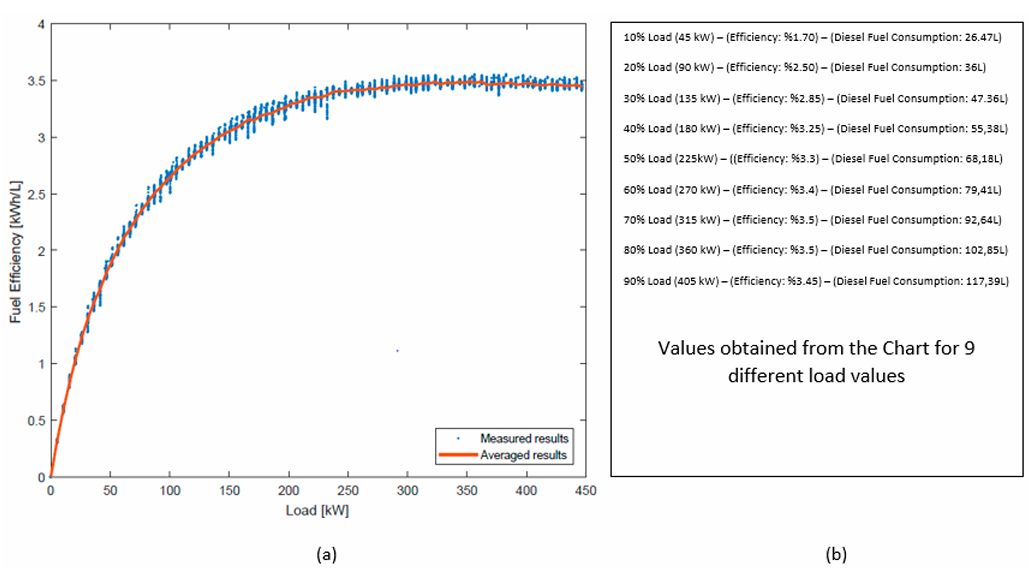

# Biến đổi

DỮ LIỆU CHI TIẾT
Load (kW)    Fuel Eff (%)    Efficiency (L/kWh)   Công thức                
--------------------------------------------------------------------------------
45           1.7             0.5882               1/(1.7)                  
90           2.5             0.4000               1/(2.5)                  
135          2.85            0.3509               1/(2.85)                 
180          3.25            0.3077               1/(3.25)                 
225          3.3             0.3030               1/(3.3)                  
270          3.4             0.2941               1/(3.4)                  
315          3.5             0.2857               1/(3.5)                  
360          3.5             0.2857               1/(3.5)                  
405          3.45            0.2899               1/(3.45)                 


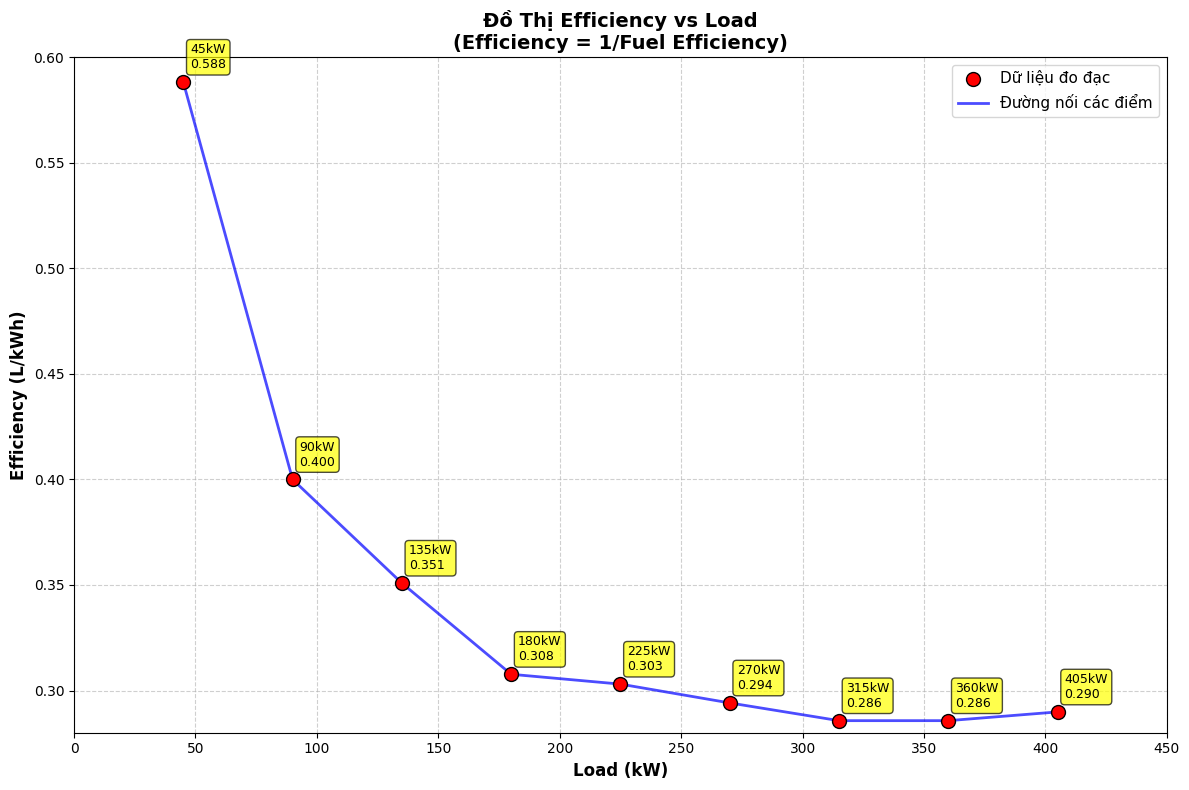

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu từ hình ảnh
load_values = [45, 90, 135, 180, 225, 270, 315, 360, 405]  # kW

# Fuel Efficiency từ hình ảnh
fuel_efficiency = [1.70, 2.50, 2.85, 3.25, 3.3, 3.4, 3.5, 3.5, 3.45]  # %

# Tính Efficiency (L/kWh) = 1/Fuel Efficiency (nghịch đảo)
# Chuyển đổi % thành decimal trước khi tính nghịch đảo
efficiency_values = [1/(fe) for fe in fuel_efficiency]

print("=" * 80)
print("DỮ LIỆU CHI TIẾT")
print("=" * 80)
print(f"{'Load (kW)':<12} {'Fuel Eff (%)':<15} {'Efficiency (L/kWh)':<20} {'Công thức':<25}")
print("-" * 80)

for i, (load, fe, eff) in enumerate(zip(load_values, fuel_efficiency, efficiency_values)):
    formula = f"1/({fe})"
    print(f"{load:<12} {fe:<15} {eff:<20.4f} {formula:<25}")

# Tạo đồ thị
plt.figure(figsize=(12, 8))

# Vẽ các điểm dữ liệu
plt.scatter(load_values, efficiency_values, color='red', s=100, zorder=5,
           label='Dữ liệu đo đạc', edgecolors='black', linewidth=1)

# Vẽ đường nối các điểm
plt.plot(load_values, efficiency_values, 'b-', linewidth=2, alpha=0.7,
         label='Đường nối các điểm')

# Thêm nhãn cho từng điểm
for i, (load, eff, fe) in enumerate(zip(load_values, efficiency_values, fuel_efficiency)):
    plt.annotate(f'{load}kW\n{eff:.3f}',
                xy=(load, eff),
                xytext=(5, 10),
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                ha='left')

# Thiết lập đồ thị
plt.xlabel('Load (kW)', fontsize=12, fontweight='bold')
plt.ylabel('Efficiency (L/kWh)', fontsize=12, fontweight='bold')
plt.title('Đồ Thị Efficiency vs Load\n(Efficiency = 1/Fuel Efficiency)',
          fontsize=14, fontweight='bold')

# Thiết lập lưới
plt.grid(True, linestyle='--', alpha=0.6)

# Thiết lập phạm vi trục
plt.xlim(0, 450)
plt.ylim(min(efficiency_values) * 0.98, max(efficiency_values) * 1.02)

# Thêm legend
plt.legend(fontsize=11)

# Điều chỉnh layout
plt.tight_layout()

# Hiển thị đồ thị
plt.show()


Kết quả đoạn 1 tại x=0.15: 0.4941

Danh sách phương trình:
Đoạn 1: y = -1.88235x + 0.77647 (x ∈ [0.1, 0.2])
Đoạn 2: y = -0.49123x + 0.49825 (x ∈ [0.2, 0.3])
Đoạn 3: y = -0.43185x + 0.48043 (x ∈ [0.3, 0.4])
Đoạn 4: y = -0.04662x + 0.32634 (x ∈ [0.4, 0.5])
Đoạn 5: y = -0.08913x + 0.34759 (x ∈ [0.5, 0.6])
Đoạn 6: y = -0.08403x + 0.34454 (x ∈ [0.6, 0.7])
Đoạn 7: y = 0.00000x + 0.28571 (x ∈ [0.7, 0.8])
Đoạn 8: y = 0.04141x + 0.25259 (x ∈ [0.8, 0.9])


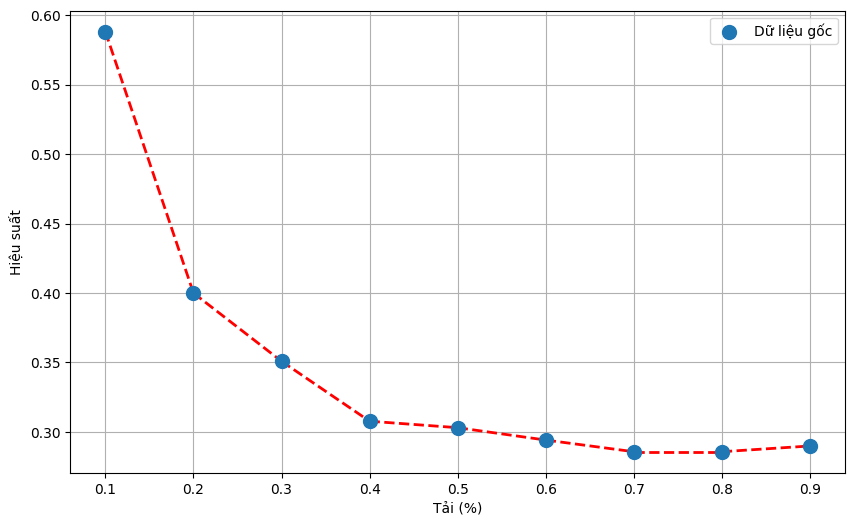

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu gốc
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fuel_efficiency = [1.70, 2.50, 2.85, 3.25, 3.3, 3.4, 3.5, 3.5, 3.45]

# Tính hiệu suất (L/kWh)
y = [1/fe for fe in fuel_efficiency]

# Tính hệ số cho từng đoạn
slopes = []
intercepts = []
for i in range(len(x)-1):
    x1, x2 = x[i], x[i+1]
    y1, y2 = y[i], y[i+1]

    slope = (y2 - y1)/(x2 - x1)
    intercept = y1 - slope*x1

    slopes.append(slope)
    intercepts.append(intercept)

# Tạo dictionary lưu trữ 8 phương trình
piecewise_functions = {}

for i in range(8):
    m = slopes[i]
    b = intercepts[i]
    x_start = x[i]
    x_end = x[i+1]

    # Định nghĩa hàm cho từng đoạn
    def func(x_val, m=m, b=b, x_start=x_start, x_end=x_end):
        if x_start <= x_val <= x_end:
            return m * x_val + b
        else:
            return None

    piecewise_functions[f'segment_{i+1}'] = func

# Ví dụ sử dụng hàm đoạn 1
test_value = 0.15
result_segment1 = piecewise_functions['segment_1'](test_value)
print(f"Kết quả đoạn 1 tại x={test_value}: {result_segment1:.4f}")

# Xuất tất cả phương trình
print("\nDanh sách phương trình:")
for i in range(8):
    print(f'Đoạn {i+1}: y = {slopes[i]:.5f}x + {intercepts[i]:.5f} '
          f'(x ∈ [{x[i]}, {x[i+1]}])')


# Vẽ đồ thị
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=100, label='Dữ liệu gốc', zorder=3)
# Vẽ từng đoạn thẳng
for i in range(len(slopes)):
    x_segment = [x[i], x[i+1]]
    y_segment = [slopes[i]*x[i] + intercepts[i],
                 slopes[i]*x[i+1] + intercepts[i]]
    plt.plot(x_segment, y_segment, 'r--', lw=2)

plt.xlabel('Tải (%)')
plt.ylabel('Hiệu suất')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Dữ liệu gốc và tính toán hệ số
x_percent = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fuel_efficiency = np.array([1.70, 2.50, 2.85, 3.25, 3.3, 3.4, 3.5, 3.5, 3.45])
y = 1 / fuel_efficiency

# Tính hệ số hồi quy
slopes = []
intercepts = []
for i in range(len(x_percent)-1):
    x1, x2 = x_percent[i], x_percent[i+1]
    y1, y2 = y[i], y[i+1]
    slope = (y2 - y1)/(x2 - x1)
    intercept = y1 - slope*x1
    slopes.append(slope)
    intercepts.append(intercept)

# Hàm xác định đoạn và tính toán
def get_efficiency(load_percent):
    """Tính hiệu suất theo % tải với xử lý ngoại lệ"""
    if load_percent < 0.0 or load_percent > 1.0:
        raise ValueError("Giá trị tải phải trong khoảng [0.0, 1.0]")
    # Xác định đoạn
    if load_percent < 0.1:
        segment = 0  # Dùng đoạn đầu tiên
    elif load_percent > 0.9:
        segment = 7  # Dùng đoạn cuối cùng
    else:
        segment = np.searchsorted(x_percent, load_percent) - 1

    # Tính toán giá trị
    return slopes[segment] * load_percent + intercepts[segment]

# Xuất phương trình cho 8 đoạn
print("Các phương trình tuyến tính từng đoạn:")
for i in range(8):
    print(f'Đoạn {i+1}: y = {slopes[i]:.5f}x + {intercepts[i]:.5f} '
          f'cho x ∈ [{x_percent[i]:.1f}, {x_percent[i+1]:.1f}]')


Các phương trình tuyến tính từng đoạn:
Đoạn 1: y = -1.88235x + 0.77647 cho x ∈ [0.1, 0.2]
Đoạn 2: y = -0.49123x + 0.49825 cho x ∈ [0.2, 0.3]
Đoạn 3: y = -0.43185x + 0.48043 cho x ∈ [0.3, 0.4]
Đoạn 4: y = -0.04662x + 0.32634 cho x ∈ [0.4, 0.5]
Đoạn 5: y = -0.08913x + 0.34759 cho x ∈ [0.5, 0.6]
Đoạn 6: y = -0.08403x + 0.34454 cho x ∈ [0.6, 0.7]
Đoạn 7: y = 0.00000x + 0.28571 cho x ∈ [0.7, 0.8]
Đoạn 8: y = 0.04141x + 0.25259 cho x ∈ [0.8, 0.9]


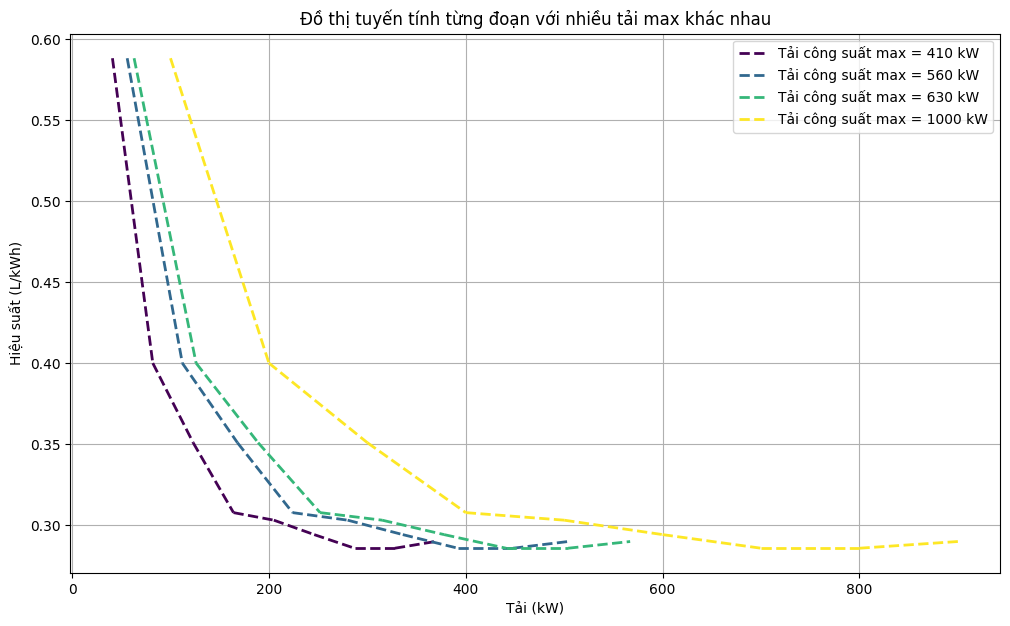

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu gốc
x_percent = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fuel_efficiency = np.array([1.70, 2.50, 2.85, 3.25, 3.3, 3.4, 3.5, 3.5, 3.45])

y = 1 / fuel_efficiency

# Tính toán các hệ số gốc (theo x_percent)
slopes_percent = []
intercepts = []

for i in range(len(x_percent)-1):
    x1, x2 = x_percent[i], x_percent[i+1]
    y1, y2 = y[i], y[i+1]

    slope = (y2 - y1)/(x2 - x1)
    intercept = y1 - slope*x1

    slopes_percent.append(slope)
    intercepts.append(intercept)

# Hàm vẽ đồ thị cho nhiều tải max
def plot_piecewise_linear_for_loads(load_max_values):
    plt.figure(figsize=(12, 7))
    colors = plt.cm.viridis(np.linspace(0, 1, len(load_max_values)))

    for idx, load_max in enumerate(load_max_values):
        slopes_kw = [slope/load_max for slope in slopes_percent]
        x_kw = x_percent * load_max

        # Vẽ từng đoạn
        for i in range(len(slopes_kw)):
            x_start = x_kw[i]
            x_end = x_kw[i+1]
            y_start = slopes_kw[i]*x_start + intercepts[i]
            y_end = slopes_kw[i]*x_end + intercepts[i]
            plt.plot([x_start, x_end], [y_start, y_end], '--', color=colors[idx], lw=2,
                     label=f'Tải công suất max = {load_max} kW' if i == 0 else "")

    plt.xlabel('Tải (kW)')
    plt.ylabel('Hiệu suất (L/kWh)')
    plt.title('Đồ thị tuyến tính từng đoạn với nhiều tải max khác nhau')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ví dụ gọi hàm với các tải max khác nhau
load_max_values = [410, 560, 630, 1000]
plot_piecewise_linear_for_loads(load_max_values)


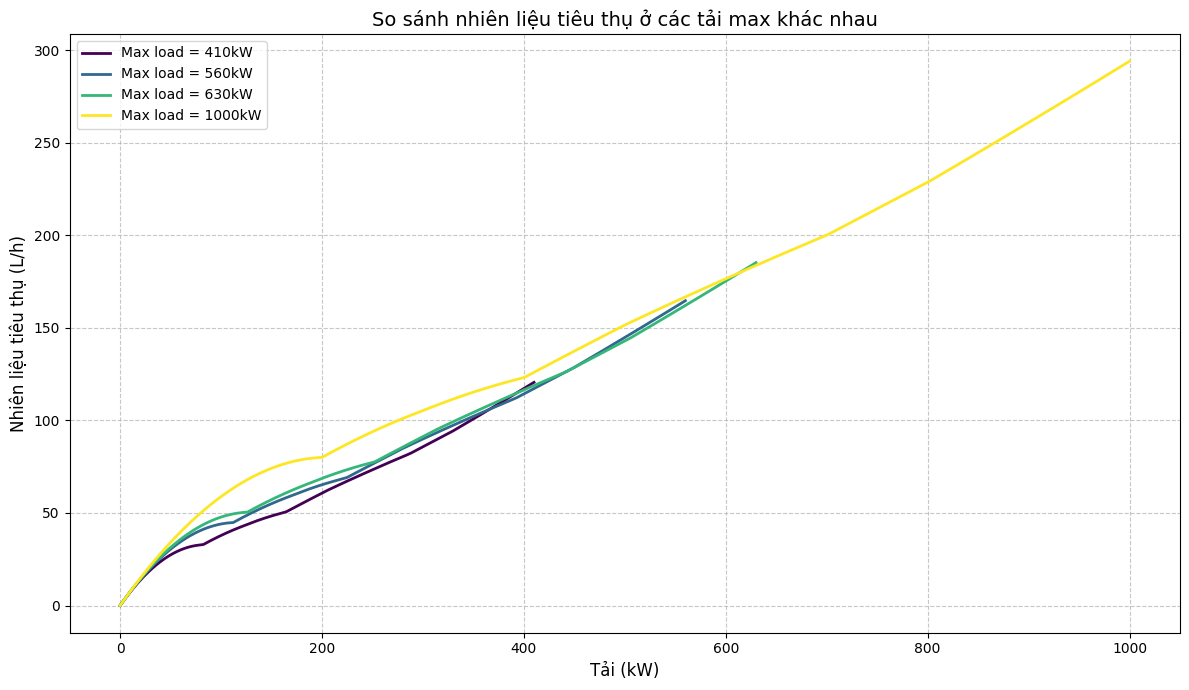

In [ ]:
# Danh sách các tải max cần vẽ
load_max_values = [410, 560, 630, 1000]  # Thay đổi các giá trị theo nhu cầu

plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(load_max_values)))

for idx, load_max in enumerate(load_max_values):
    # Tạo dải tải và tính toán
    loads = np.linspace(0, load_max, 1000)
    load_percentages = loads / load_max

    fuel_consumption = np.array([
        get_efficiency(lp) * load
        for lp, load in zip(load_percentages, loads)
    ])

    # Vẽ đường cong
    plt.plot(loads, fuel_consumption,
             color=colors[idx],
             lw=2,
             label=f'Max load = {load_max}kW')


plt.xlabel('Tải (kW)', fontsize=12)
plt.ylabel('Nhiên liệu tiêu thụ (L/h)', fontsize=12)
plt.title('So sánh nhiên liệu tiêu thụ ở các tải max khác nhau', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

        2
0.8661 x - 1.146 x + 0.6438
        3         2
-2.027 x + 3.907 x - 2.427 x + 0.7776
       4         3         2
5.133 x - 12.29 x + 10.76 x - 4.15 x + 0.9034


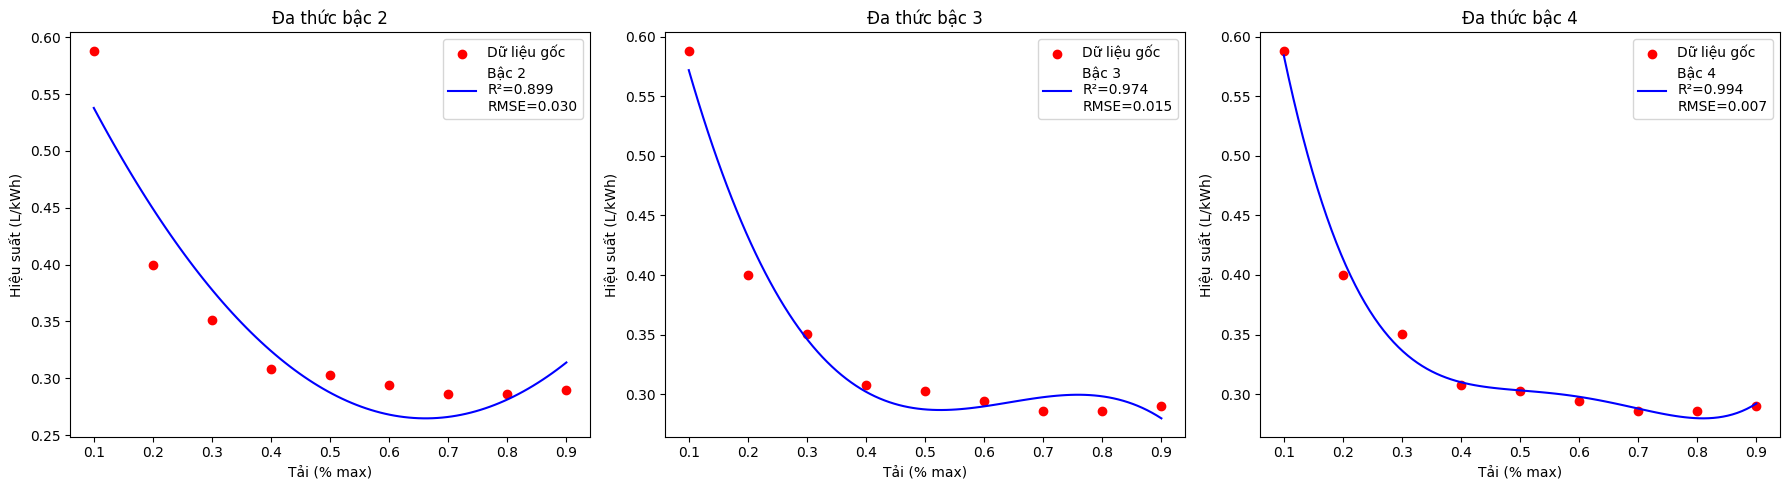

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Dữ liệu gốc
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
y = np.array([1.70, 2.50, 2.85, 3.25, 3.3, 3.4, 3.5, 3.5, 3.45])
y = 1 / y  # Chuyển đổi sang hiệu suất (L/kWh)

# Chỉ lấy 3 bậc đầu
degrees = [2, 3, 4]
plt.figure(figsize=(18, 5))  # Điều chỉnh kích thước ngang

for i, degree in enumerate(degrees):
    # Tính toán hệ số
    coefficients = np.polyfit(x, y, degree)
    poly_func = np.poly1d(coefficients)

    # Dự đoán và tính metrics
    y_pred = poly_func(x)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(poly_func)

    # Vẽ subplot
    plt.subplot(1, 3, i+1)
    plt.scatter(x, y, color='red', label='Dữ liệu gốc')
    x_plot = np.linspace(0.1, 0.9, 100)
    y_plot = poly_func(x_plot)
    plt.plot(x_plot, y_plot, 'b-', label=f'Bậc {degree}\nR²={r2:.3f}\nRMSE={rmse:.3f}')
    plt.xlabel('Tải (% max)')
    plt.ylabel('Hiệu suất (L/kWh)')
    plt.legend()
    plt.title(f'Đa thức bậc {degree}')

plt.tight_layout()
plt.show()
